In [1]:
!pip install scikit-learn==1.1.3

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#class_weight='balanced'" data-toc-modified-id="class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>class_weight='balanced'</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    f1_score, 
    roc_auc_score,
    roc_curve,
    recall_score
) 

from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler
)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Churn.csv')

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
data.info()
#Есть пропуски в колонке (сколько лет человек является клиентом банка)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
data.duplicated().sum()
#Дупликатов не выявлено

0

In [6]:
# для отбора записей с пропусками в Tenure
#mask = data["Tenure"].isna()

# сколько пропущенных значений всего нужно заполнить
#n_samples = mask.sum()

# сэмплируем случайные значения, используем values, чтобы корректно записать значения в пропущенные ячейки (игнорируя индекс)
#random_samples = data.loc[~mask, "Tenure"].sample(n_samples, replace=True, random_state=12345).values

# заполняем случайными значениями пропуски
#data.loc[mask, "Tenure"] = random_samples
#Пропуски в колонке Tenure были заполнены случайными значениями из выборки


In [7]:
data.loc[data['Tenure'].isna(),'Tenure'] = data['Tenure'].median()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [9]:
#создадим новый датафрейм в которым не будет лишних колонок (RowNumber,CustomerID)
df = data.drop(columns=['RowNumber','CustomerId','Surname'],axis=1)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [11]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


#Разбиваем выборки на тренировочные и другие
target = df['Exited']
features = df.drop(['Exited'] , axis=1)
features_train, features_other, target_train, target_other = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=df["Exited"])

#Разбиваем выборки на валидационные и тестовые
features_valid, features_test, target_valid, target_test = train_test_split(
    features_other, target_other, test_size=0.5, random_state=12345)

In [12]:
data_train,data_other = train_test_split(
        df,test_size=0.25,random_state=12345,stratify=df['Exited']
)

In [13]:
data_valid,data_test = train_test_split(
    data_other,test_size=0.5,random_state=12345
)

In [14]:
features_train = data_train.drop(['Exited'],axis=1)
ohe_features = features_train.select_dtypes(include='object').columns.to_list() #категоральные признаки
num_features = features_train.select_dtypes(exclude='object').columns.to_list() #численные признаки

In [15]:
# drop='first' удаляет первый признак из закодированных:
# таким образом обходим dummy-ловушку
# задаём handle_unknown='ignore':
# игнорируется ранее невстречающиеся значения признака (при transform)
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# обучаем энкодер на заданных категориальных признаках тренировочной выборки
encoder_ohe.fit(data_train[ohe_features])

# добавляем закодированные признаки в X_train_ohe
# encoder_ohe.get_feature_names_out() позволяет получить названия колонок
data_train[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(data_train[ohe_features])

# удаляем незакодированные категориальные признаки (изначальные колонки)
data_train = data_train.drop(ohe_features, axis=1)

# создаём скелер
scaler = StandardScaler()

# обучаем его на численных признаках тренировочной выборки, трансформируем её же
data_train[num_features] = scaler.fit_transform(data_train[num_features])

# смотрим на результат
data_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3349,0.153616,0.583435,-0.004794,1.264113,0.807524,0.652368,-1.034460,-0.848725,1,1.0,0.0,0.0
7094,-0.104283,2.694224,-0.731152,-1.222762,-0.915010,-1.532876,0.966688,-1.003683,0,0.0,0.0,0.0
9204,-0.042388,-0.855740,-0.004794,-1.222762,0.807524,0.652368,-1.034460,-1.508697,0,0.0,0.0,0.0
6620,0.844786,-0.280070,-0.004794,-1.222762,0.807524,0.652368,-1.034460,1.057193,0,0.0,0.0,1.0
4737,1.453428,-0.280070,0.358385,0.555736,-0.915010,0.652368,0.966688,1.553724,0,0.0,0.0,1.0


In [16]:
data_valid[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(data_valid[ohe_features])
data_valid = data_valid.drop(ohe_features, axis=1)
data_valid[num_features] = scaler.fit_transform(data_valid[num_features])

data_test[
    encoder_ohe.get_feature_names_out()
] = encoder_ohe.transform(data_test[ohe_features])
data_test = data_test.drop(ohe_features, axis=1)
data_test[num_features] = scaler.fit_transform(data_test[num_features])


In [17]:
data_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
3349,0.153616,0.583435,-0.004794,1.264113,0.807524,0.652368,-1.034460,-0.848725,1,1.0,0.0,0.0
7094,-0.104283,2.694224,-0.731152,-1.222762,-0.915010,-1.532876,0.966688,-1.003683,0,0.0,0.0,0.0
9204,-0.042388,-0.855740,-0.004794,-1.222762,0.807524,0.652368,-1.034460,-1.508697,0,0.0,0.0,0.0
6620,0.844786,-0.280070,-0.004794,-1.222762,0.807524,0.652368,-1.034460,1.057193,0,0.0,0.0,1.0
4737,1.453428,-0.280070,0.358385,0.555736,-0.915010,0.652368,0.966688,1.553724,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2360,-1.362832,0.199655,-0.004794,0.547034,-0.915010,0.652368,-1.034460,-0.197119,0,1.0,0.0,0.0
4499,-1.177144,0.487490,-0.367973,0.727394,-0.915010,-1.532876,-1.034460,0.527967,0,1.0,0.0,0.0
1030,0.824154,0.007765,-1.457510,0.641624,-0.915010,-1.532876,-1.034460,0.783219,0,0.0,0.0,1.0
700,1.030473,-0.663850,-0.004794,-1.222762,0.807524,0.652368,-1.034460,-0.087802,0,0.0,0.0,0.0


In [18]:
features_valid = data_valid.drop(['Exited'],axis=1)
target_valid = data_valid['Exited']
features_test = data_test.drop(['Exited'],axis=1)
target_test = data_test['Exited']
features_train = data_train.drop(['Exited'],axis=1)
target_train = data_train['Exited']

In [19]:
df[df['Exited'] == 1].count().mean()

2037.0

In [20]:
df[df['Exited'] == 0].count().mean()

7963.0

## Исследование задачи

**LogisticRegression**

In [21]:
model = LogisticRegression(random_state=12345)
model.fit(features_train,target_train)
prediction = model.predict(features_valid)
print('f1_score:',f1_score(target_valid,prediction))

f1_score: 0.3440233236151603


In [22]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.7721634569775163


**RandomForestClassifier**

In [23]:
best_score = 0
best_param = [0,0]
best_accuracy = 0
for est in range(1, 100, 5):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train,target_train)
        prediction = model.predict(features_valid)
        score = f1_score(target_valid,prediction)
        ac_score = accuracy_score(target_valid,prediction)
        if score > best_score:
            best_score = score
            best_param[0] = est
            best_param[1] = depth
            best_accuracy = ac_score
print('Best f1 score:',best_score)  
print('Best n:', best_param[0]) 
print('Best depth:', best_param[1])
print('Best accuracy_score:',best_accuracy)

Best f1 score: 0.6172248803827751
Best n: 71
Best depth: 15
Best accuracy_score: 0.872


In [24]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8815498213325744


**DecisionTreeClassifier**

In [25]:
best_f1_score = 0
for d in range(1,16,1):
    model = DecisionTreeClassifier(max_depth=d,random_state=12345)
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)
    score = f1_score(target_valid,prediction)
    if score > best_f1_score:
        best_f1_score = score
        best_depth = d
        
print('Best f1 score:',best_f1_score)  
print('Best depth:', best_depth)
    

Best f1 score: 0.6091127098321344
Best depth: 6


In [26]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.7302260221990324


**Вывод**:

Лучшие результаты без учётом дисбаланса классов показала модель случайного леса

Best f1 score: 0.6172248803827751

Best accuracy_score: 0.872

AUC-ROC: 0.8815498213325744



## Борьба с дисбалансом

### class_weight='balanced'

**LogisticRegression**

In [27]:
model = LogisticRegression(random_state=12345,class_weight='balanced')
model.fit(features_train,target_train)
prediction = model.predict(features_valid)
print('f1_score:',f1_score(target_valid,prediction))

f1_score: 0.4937586685159501


In [28]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.7795552287891725


**RandomForestClassifier**

In [29]:
best_score = 0
best_param = [0,0]
best_accuracy = 0
for est in range(1, 100, 5):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth,class_weight='balanced')
        model.fit(features_train,target_train)
        prediction = model.predict(features_valid)
        score = f1_score(target_valid,prediction)
        ac_score = accuracy_score(target_valid,prediction)
        if score > best_score:
            best_score = score
            best_param[0] = est
            best_param[1] = depth
            best_accuracy = ac_score
print('Best f1 score:',best_score)  
print('Best n:', best_param[0]) 
print('Best depth:', best_param[1])
print('Best accuracy_score:',best_accuracy)

Best f1 score: 0.6679174484052532
Best n: 21
Best depth: 9
Best accuracy_score: 0.8584


In [30]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.8774072668627266


**DecisionTreeClassifier**

In [31]:
best_f1_score = 0
for d in range(1,16,1):
    model = DecisionTreeClassifier(max_depth=d,random_state=12345,class_weight='balanced')
    model.fit(features_train,target_train)
    prediction = model.predict(features_valid)
    score = f1_score(target_valid,prediction)
    if score > best_f1_score:
        best_f1_score = score
        best_depth = d
        
print('Best f1 score:',best_f1_score)  
print('Best depth:', best_depth)
    

Best f1 score: 0.5957446808510638
Best depth: 6


In [32]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.7215179616102203


**Вывод**:

Лучшие результаты с учётом дисбаланса классов показала модель случайного леса

Best f1 score: 0.6679174484052532

Best accuracy_score: 0.8584

AUC-ROC: 0.8774072668627266

### Upsampling

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [34]:
features_upsampled, target_upsampled = upsample(features_train,target_train,4)

In [35]:
target_upsampled[target_upsampled == 1].count()

6112

In [36]:
target_upsampled[target_upsampled == 0].count()

5972

In [37]:
best_score = 0
best_param = [0,0]
best_accuracy = 0
for est in range(1, 100, 5):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled,target_upsampled)
        prediction = model.predict(features_valid)
        score = f1_score(target_valid,prediction)
        ac_score = accuracy_score(target_valid,prediction)
        if score > best_score:
            best_score = score
            best_param[0] = est
            best_param[1] = depth
            best_accuracy = ac_score
print('Best f1 score:',best_score)  
print('Best n:', best_param[0]) 
print('Best depth:', best_param[1])
print('Best accuracy_score:',best_accuracy)

Best f1 score: 0.6678200692041522
Best n: 26
Best depth: 9
Best accuracy_score: 0.8464


In [38]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.879680137874332


**Вывод**:

Модель случайного леса с upsampling показала:

Best f1 score: 0.6678200692041522

Best accuracy_score: 0.8464

AUC-ROC: 0.885478923568289

### Downsampling

In [39]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [40]:
features_downsampled, target_downsampled = downsample(features_train,target_train,0.25)

In [41]:
target_downsampled[target_downsampled == 1].count()

1528

In [42]:
target_downsampled[target_downsampled == 0].count()

1493

In [43]:
best_score = 0
best_param = [0,0]
best_accuracy = 0
for est in range(1, 100, 5):
    for depth in range(1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled,target_downsampled)
        prediction = model.predict(features_valid)
        score = f1_score(target_valid,prediction)
        ac_score = accuracy_score(target_valid,prediction)
        if score > best_score:
            best_score = score
            best_param[0] = est
            best_param[1] = depth
            best_accuracy = ac_score
print('Best f1 score:',best_score)  
print('Best n:', best_param[0]) 
print('Best depth:', best_param[1])
print('Best accuracy_score:',best_accuracy)

Best f1 score: 0.6345256609642302
Best n: 26
Best depth: 8
Best accuracy_score: 0.812


In [44]:
probabilities = model.predict_proba(features_valid)
probabilities_one_valid = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_valid, probabilities_one_valid))

AUC-ROC: 0.873223207791797


**Вывод**:

Модель случайного леса с downsampling показала:

Best f1 score: 0.6345256609642302

Best accuracy_score: 0.812

AUC-ROC: 0.873223207791797

**Общий вывод**:

Лучшие результаты с учётом дисбаланса классов показала модель случайного леса

Best f1 score: 0.6679174484052532

Best accuracy_score: 0.8584

AUC-ROC: 0.8774072668627266

## Тестирование модели

In [45]:
model = RandomForestClassifier(n_estimators = 21,max_depth=9,random_state=12345,class_weight = 'balanced')
model.fit(features_train,target_train)
prediction = model.predict(features_test)
print('f1 score:',f1_score(target_test,prediction))
probabilities = model.predict_proba(features_test)
probabilities_one_test = probabilities[:,1]
print('AUC-ROC:',roc_auc_score(target_test, probabilities_one_test))
print('accuracy score:',accuracy_score(target_test,prediction))
print('Recall:',recall_score(target_test,prediction))

f1 score: 0.6198198198198198
AUC-ROC: 0.8489427529805892
accuracy score: 0.8312
Recall: 0.6745098039215687


In [46]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities[:, 1]) 

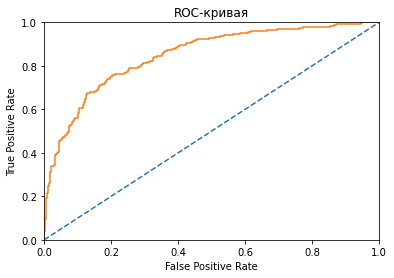

In [47]:
plt.figure()
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

**Константная модель**

In [48]:
const_model = pd.Series(0,index = features_test.index)

In [49]:
print('Accuracy score const model:',accuracy_score(const_model,target_test))

Accuracy score const model: 0.796


**Вывод**:

Тестирование модели случайного леса на тестовой выборке показало c upsampling:

f1 score: 0.6198198198198198

AUC-ROC: 0.8489427529805892

accuracy score: 0.8312

Recall: 0.6745098039215687 - способность модели находить положительные классы

Accuracy score для константной модели показало  Accuracy score const model: 0.796


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*